(To be run in Colab)

Update diffusion_itm.py in the inference branch to run the benchmark on the right checkpoint.

In [ ]:
!git clone --recurse-submodules git@github.com:archana53/diffusion-itm.git --branch inference

Cloning into 'diffusion-itm'...
remote: Enumerating objects: 303, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 303 (delta 57), reused 63 (delta 40), pack-reused 204
Receiving objects: 100% (303/303), 30.30 MiB | 12.23 MiB/s, done.
Resolving deltas: 100% (132/132), done.
Submodule 'diffusers' (git@github.com:McGill-NLP/diffusers.git) registered for path 'diffusers'
Cloning into '/content/diffusion-itm/diffusers'...
remote: Enumerating objects: 23500, done.        
remote: Counting objects: 100% (1/1), done.        
remote: Total 23500 (delta 0), reused 0 (delta 0), pack-reused 23499        
Receiving objects: 100% (23500/23500), 18.83 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (16060/16060), done.
Submodule path 'diffusers': checked out '8ad50fd43f1739b3808cca6564b69bc77ddabdbc'


In [8]:
!mkdir -p ~/diffusers

In [4]:
!env --chdir=/content/diffusion-itm/diffusers -S python3 setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [5]:
!git lfs install


Git LFS initialized.


In [6]:
!git clone https://huggingface.co/archana53/soft-neg-ckpt-9k

Cloning into 'soft-neg-ckpt-9k'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (12/12), 2.21 KiB | 754.00 KiB/s, done.


In [7]:
!mv soft-neg-ckpt-9k/ diffusion-itm/checkpoints/soft-neg-ckpt-9k/

In [8]:
!env --chdir=/content/diffusion-itm/ -S pip install -r requirements.txt

In [ ]:
#!env --chdir=/content/diffusion-itm/ -S sh setup.sh

In [9]:
# Update token in datasets_loading.py

!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid (permission: read).
Cannot authenticate through git-creden

In [14]:
!env --chdir=/content/diffusion-itm/ -S sh setup.sh

Streaming output truncated to the last 5000 lines.
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img1.jpg  
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img8.jpg  
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img3.jpg  
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img4.jpg  
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img9.jpg  
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img2.jpg  
   creating: data/imagecode/image-sets/MSR-VTT-videoTrainValVideo_video939-shot2_0/
  inflating: data/imagecode/image-sets/MSR-VTT-videoTrainValVideo_video939-shot2_0/img6.jpg  
  inflating: data/imagecode/image-sets/MSR-VTT-videoTrainValVideo_video939-shot2_0/img39.jpg  
  inflating: data/imagecode/image-sets/MSR-VTT-videoTrainValVideo_video939-shot2_0/img34.jpg  
  inflating: data/imagecode/image-sets/MSR-VTT-videoTrainValVideo_video939-sh

In [ ]:
!env --chdir=/content/diffusion-itm/ -S python3 diffusion_itm.py --task imagecode --version 1.5 --load_from_ckpt checkpoints/hardneg-checkpoint-5000/pytorch_lora_weights.bin

In [76]:
import matplotlib.pyplot as plt


def get_batch(i, args, batch, model):
    """
    Takes a batch of images and captions and returns a score for each image-caption pair.
    """

    imgs, texts = batch[0], batch[1]
    imgs, imgs_resize = imgs[0], imgs[1]
    imgs_resize = [img.cuda() for img in imgs_resize]

    scores = []
    for txt_idx, text in enumerate(texts):
        for img_idx, resized_img in enumerate(imgs_resize):
            if len(resized_img.shape) == 3:
                resized_img = resized_img.unsqueeze(0)

            print(f'Batch {i}, Text {txt_idx}, Image {img_idx}')
            print(text[0])

            plt.imshow(resized_img[0].cpu().numpy().transpose(1, 2, 0))
            plt.axis('off')  # Turn off axis
            plt.show()

    #         dists = model(prompt=list(text), image=resized_img, guidance_scale=args.guidance_scale, sampling_steps=args.sampling_steps, unconditional=args.img_retrieval)
    #         dists = dists.to(torch.float32)
    #         dists = dists.mean(dim=1)
    #         dists = -dists
    #         scores.append(dists)

    # scores = torch.stack(scores).permute(1, 0) if args.batchsize > 1 else torch.stack(scores).unsqueeze(0)
    return scores


Batch 0, Text 0, Image 0
an old person kisses a young person


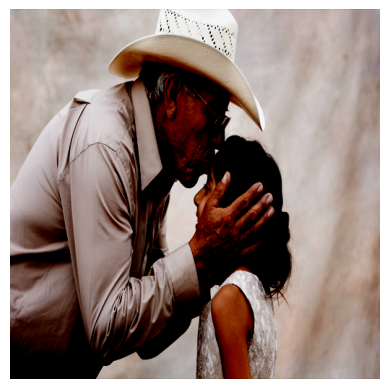

Batch 0, Text 0, Image 1
an old person kisses a young person


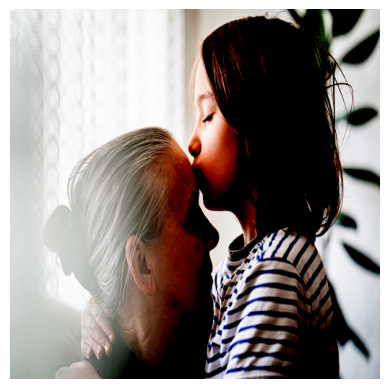

Batch 0, Text 1, Image 0
a young person kisses an old person


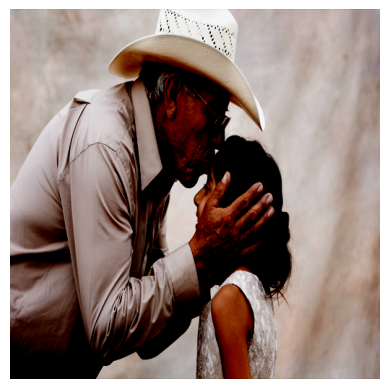

Batch 0, Text 1, Image 1
a young person kisses an old person


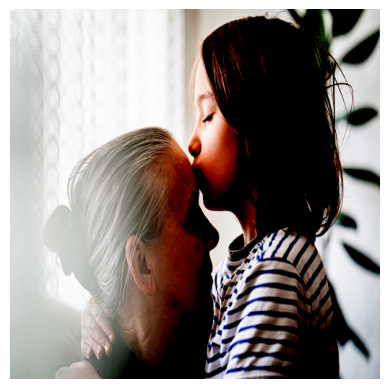

In [77]:
sampled_images = []
for obj in dataloader:
    get_batch(0, {}, obj, None)
    break
    # for image, label in zip(images, labels):
    #     sampled_images.append((image, label))
    #     if len(sampled_images) >= 5:
    #         break
    # if len(sampled_images) >= 5:
    #     break